In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import copy
from matplotlib import rc
from IPython import display
import random
%matplotlib inline

In [3]:
### PARAMETERS ###

epochs = 1000            ### Number of cycles
world_size = 50        ### Linear dimensions of the (squared) world
group_size = 5         ### Linear dimensions of the (suqared) community
filling = 0.05   ### How "full" the starting world is

IsWorldFuzzy = False    ### "Fuzzy" world means that cells have a random chance of switching
p_fuzzy = 1.0/world_size/world_size     ### Note that approx. P(1 switch) = world_size*world_size*p_fuzzy
                       ### If world_size ~ 100, p_fuzzy should be ~ 0.01 ~ to get 100 events (over 10 thousand squares)

alive = 1              ### Def. 1 alive and 0 dead 
dead = 0               ###
start = time.time()

In [4]:
### Function to generate a grid with random 1 and 0
def init_grid(size): 
    return np.random.choice([0,1], size*size, p=[1-filling, filling]).reshape(size, size) 

In [5]:
### Generate world and group at random
world = init_grid(world_size)
group = init_grid(group_size)

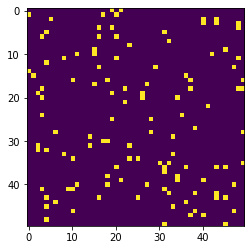

In [6]:
### PLOT INITIAL STATE
plt.imshow(world)
plt.show()

In [7]:
## FUNCTIONS TO PASS FROM SPARSE TO MATRIX REPRESENTATION AND VICE VERSA
### np.argwhere(matrix) returns an array with the coordinates of the vaues that are "1" on the matrix
### The rest is nothing but unexciting python tricks

## TAKE GRID (0 and 1) AS INPUT, RETURN LIST (of coordinates)
def grid_to_list(grid):
    population = np.argwhere(grid).tolist() 
    return population

def grid_to_set(grid):
    population = np.argwhere(grid).tolist()
    population = tuple(map(tuple, population))
    population = set(population)
    return population

## TAKE LIST (of coordinates) AS INPUT, RETURN GRID (of 0 and 1)
def list_to_grid(population, world_size):
    new_grid = np.zeros((world_size, world_size))
    if not population:
        return new_grid
    else:
        row_indices = population[:,0]
        col_indices = population[:,1]
        new_grid[row_indices,col_indices] = 1
        return new_grid    
## TAKE SET (of coordinates) AS INPUT, RETURN GRID (of 0 and 1)
def set_to_grid(population, world_size):
    new_grid = np.zeros((world_size, world_size))
    population = list(population)
    ### BUGFIX v0.1: before it would return an error if the list was empty
    if not population:  
        return new_grid
    else:
        population = np.array(population, dtype = int)
        row_indices = population[:,0]
        col_indices = population[:,1]
        new_grid[row_indices,col_indices] = 1
        return new_grid

In [8]:
### TAKE STARTING WORLD, TRANSFORM INTO LIST OF COORDINATES OF ALIVE CELLS
alive_cells = grid_to_set(world)

In [9]:
### BELOW:
# functions that are the core of the running algorithm
# get_neighbours generates the coordinates of the 8 neighbours of a cell
# apply_rules reads the list of alive cells and decides which lives and which dies
# fuzzy_rules introduces some random chance of a cell switching from 0 to 1 and vice versa
# time_step uses everything else to advance the world of one time step (surprisingly)

In [10]:
## Receive in input the coords of an alive cell
## returns the coords of its neighbors
## uses periodic boundary conditions
def get_neighbours(element, world_size):
    l = []
    l.append( ( (element[0]-1)%world_size, (element[1]  )%world_size ) )
    l.append( ( (element[0]-1)%world_size, (element[1]+1)%world_size ) )
    l.append( ( (element[0]-1)%world_size, (element[1]-1)%world_size ) )
    l.append( ( (element[0]  )%world_size, (element[1]+1)%world_size ) )
    l.append( ( (element[0]  )%world_size, (element[1]-1)%world_size ) )
    l.append( ( (element[0]+1)%world_size, (element[1]+1)%world_size ) )
    l.append( ( (element[0]+1)%world_size, (element[1]-1)%world_size ) )
    l.append( ( (element[0]+1)%world_size, (element[1]  )%world_size ) )
    return l

In [11]:
## SET OF RULES ON SPARSE SET
def apply_rules(alive_cells, world_size):
    counter = {}
    for cell in alive_cells:
        if cell not in counter: ## You don't want to look twice at the same cell
            counter[cell] = 0   ## Initialize counter for alive cells
        neighbours = get_neighbours(cell, world_size) ## Obtain a LIST containing the coordinates of neighbours
        for n in neighbours:
            if n not in counter: ## Cells not in the counter are currently dead
                counter[n] = 1   ## Initialize them with 1 (the current neighbour)
            else:                ## Cells already in the counter are alive
                counter[n] += 1  ## Increment their counter by one
    for c in counter:            ## Now look at the newly created list and apply rules
        if (counter[c] < 2 or counter[c] > 3):
            alive_cells.discard(c)
        if (counter[c] == 3):
            alive_cells.add(c)   ## Add or discard cells according to rules
    
    return  

In [12]:
## FUZZINESS IN THE WORLD
def fuzzy_rules(alive_cells, world_size, p_fuzzy):
    world = set_to_grid(alive_cells, world_size)
    fuzzy_world = np.zeros((world_size,world_size))
    fuzzy_mask = np.random.rand(world_size,world_size) < p_fuzzy
    fuzzy_events = sum(sum(fuzzy_mask))
    if fuzzy_events != 0:
        print("There were ", fuzzy_events, " fuzzy events today!")
    fuzzy_world[fuzzy_mask] = np.ones((world_size,world_size))[fuzzy_mask] + world[fuzzy_mask]
    fuzzy_world[~fuzzy_mask] = world[~fuzzy_mask]
    fuzzy_world = np.mod(fuzzy_world,2)
    alive_cells = grid_to_set(fuzzy_world)
    return alive_cells

In [22]:
## CALCULATE REWARD
def calculate_reward(next_world, world_size, group_size):
    if not np.any(next_world):
        reward = -group_size*epochs
    else:
        reward = np.sum(next_world[0:group_size,0:group_size])
    return reward

SyntaxError: invalid syntax (<ipython-input-22-8fbd58601287>, line 7)

In [20]:
x = np.arange(0,36)
x = np.reshape(x,(6,6))
print(x)
np.sum(x[2:3,2:3])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


14

In [13]:
## CALCULATE EFFECT OF ACTION
def calculate_action(action, old_world):
    reshape_action = np.reshape(action,(group_size,group_size))
    old_world[0:group_size,0:group_size] = np.mod(old_world[0:group_size,0:group_size] + reshape_action, 2)
    return old_world

In [14]:
## FUNCTION WHICH MAKES THE TIME STEP
def time_step(alive_cells, world_size, IsWorldFuzzy, p_fuzzy):
    done = 0
    old_world = set_to_grid(alive_cells, world_size)
    apply_rules(alive_cells, world_size)
    if IsWorldFuzzy:
        alive_cells = fuzzy_rules(alive_cells, world_size, p_fuzzy)
    next_world = set_to_grid(alive_cells, world_size)
    reward = calculate_reward(next_world, world_size, group_size)
    if np.array_equal(old_world, next_world):
        done = 1
    return reward, next_world, done

KeyboardInterrupt: 

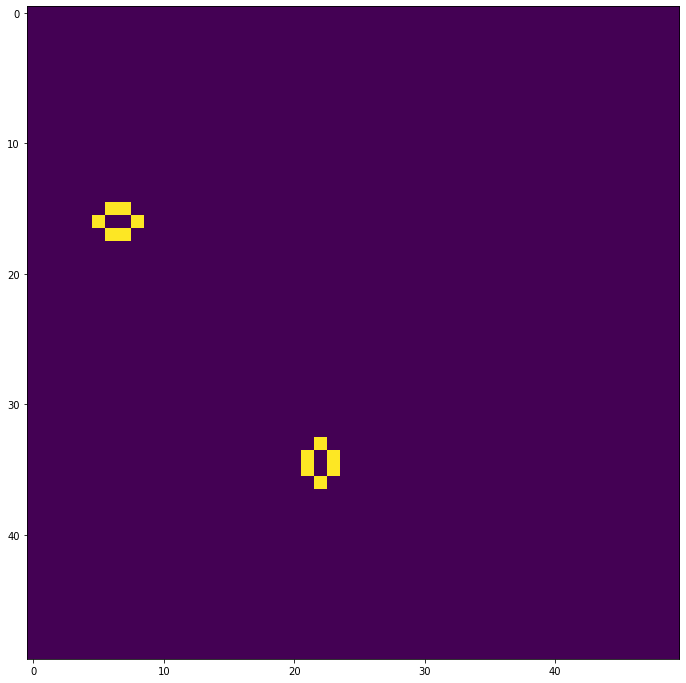

In [15]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(14, 12))
fig.canvas.draw()
img = ax.imshow(world, interpolation='none')
action = np.zeros(group_size*group_size)

## NOW: implement a real choice of action!!

for i in range(epochs):
    ### FIRST STEP: the agent performs an action on the world
    next_world = set_to_grid(alive_cells, world_size)
    next_world = calculate_action(action, next_world)
    alive_cells = grid_to_set(next_world)
    ### SECOND STEP: time evolution (including the action of the agent)
    ### RETURNS: the reward, the status of the world, and the variable "Done"
    reward, world, done = time_step(alive_cells, world_size, IsWorldFuzzy, p_fuzzy)
    ### THIRD STEP: save "old" configuration
    old_world = world
    ### INFORMATIVE MESSAGE
    if (i%(int(epochs/100))==0):
        print(i/epochs*100, "% of epochs done")
    ### PLOT WORLD STATUS
    alive_cells = grid_to_set(world)
    img.set_data(world)
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)